# Objective

# 1. Libraries Implemented

In [1]:
# enable inline plotting with matplotbib and seaborn
%matplotlib inline
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import random
import time

## Classification Algorithms
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

# Libraries for constructing Pipelines
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.decomposition import PCA

# Library for Normalization of Numerical Data
import scipy.stats 

from sklearn.feature_selection import RFE, SelectKBest, chi2, SelectFromModel

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import (accuracy_score,confusion_matrix, classification_report, roc_auc_score,
f1_score, recall_score, precision_score, SCORERS)

#SMOTE
from imblearn.over_sampling import SMOTE

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
def grid_pipe(pipedict, hyperdict, scoring='accuracy', display=True):
    model_scores=[]
    fitted_models={}
    for name, pipeline in pipedict.items():
    # Construct grid search
        model = GridSearchCV(estimator=pipeline,
                             param_grid=hyperdict[name],
                             scoring=scoring,
                             cv=5, verbose=2, n_jobs=-1, return_train_score = True)

        # Fit using grid search
        start = time.time()
        model.fit(x_train, y_train)
        end = time.time()
        #Append scores and time
        model_scores.append((name,model.best_score_,end-start))
        #Append model
        fitted_models[name]=model
        if display:
            #Print when the model has been fitted
            print(f'The {name} model has been fitted.')
            # Best accuracy
            print('Best accuracy: %.3f' % model.best_score_)
            # Best params
            print('Best params:\n', model.best_params_,'\n')
            means = model.cv_results_['mean_test_score']
            stds = model.cv_results_['std_test_score']
            params = model.cv_results_['params']
            for mean, stdev, param in zip(means, stds, params):
                print('{0} ({1}) with: {2}'.format(mean, stdev, param))
    
    return model_scores, fitted_models

# 2. Data Collection

## 2.1 Data Source

The Data Source for the current project is taken from the **Kaggle** repository 

## 2.2 Data Loading

    A Test Repository is created in GitHub that contains the Dataset for the analysis.

In [3]:
data = pd.read_csv(r"D:\Users\850047688\task-1\german_credit.csv")
print(data.columns)

Index(['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'],
      dtype='object')


In [4]:
"""Account Balance: No account (1), None (No balance) (2), Some Balance (3)
Payment Status: Some Problems (1), Paid Up (2), No Problems (in this bank) (3)
Savings/Stock Value: None, Below 100 DM, [100, 1000] DM, Above 1000 DM
Employment Length: Below 1 year (including unemployed), [1, 4), [4, 7), Above 7
Sex/Marital Status: Male Divorced/Single, Male Married/Widowed, Female
No of Credits at this bank: 1, More than 1
Guarantor: None, Yes
Concurrent Credits: Other Banks or Dept Stores, None
ForeignWorker variable may be dropped from the study
Purpose of Credit: New car, Used car, Home Related, Other"""

print("Number of observations: ", len(data))
data.head(10)

Number of observations:  1000


,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
5,1,1,10,4,0,2241,1,2,1,3,...,3,1,48,3,1,2,2,2,1,2
6,1,1,8,4,0,3398,1,4,1,3,...,4,1,39,3,2,2,2,1,1,2
7,1,1,6,4,0,1361,1,2,2,3,...,4,1,40,3,2,1,2,2,1,2
8,1,4,18,4,3,1098,1,1,4,2,...,4,3,65,3,2,2,1,1,1,1
9,1,2,24,2,3,3758,3,1,1,2,...,4,4,23,3,1,1,1,1,1,1


## 2.3 Data Cleansing

In [5]:
data.rename(columns = {'Creditability' : 'Credibility'}, inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Credibility                          1000 non-null int64
Account Balance                      1000 non-null int64
Duration of Credit (month)           1000 non-null int64
Payment Status of Previous Credit    1000 non-null int64
Purpose                              1000 non-null int64
Credit Amount                        1000 non-null int64
Value Savings/Stocks                 1000 non-null int64
Length of current employment         1000 non-null int64
Instalment per cent                  1000 non-null int64
Sex & Marital Status                 1000 non-null int64
Guarantors                           1000 non-null int64
Duration in Current address          1000 non-null int64
Most valuable available asset        1000 non-null int64
Age (years)                          1000 non-null int64
Concurrent Credits                   1000 non-null int64
Type of apartment                    10

In [7]:
### Checking for missing values 
for col in data:
    print(col, ": ", sum(data[col].isnull()))

Credibility :  0
Account Balance :  0
Duration of Credit (month) :  0
Payment Status of Previous Credit :  0
Purpose :  0
Credit Amount :  0
Value Savings/Stocks :  0
Length of current employment :  0
Instalment per cent :  0
Sex & Marital Status :  0
Guarantors :  0
Duration in Current address :  0
Most valuable available asset :  0
Age (years) :  0
Concurrent Credits :  0
Type of apartment :  0
No of Credits at this Bank :  0
Occupation :  0
No of dependents :  0
Telephone :  0
Foreign Worker :  0


In [8]:
data.describe()

,Credibility,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [9]:
### Unique values for each column
for col in data:
    print(col, ":", data[col].unique())

Credibility : [1 0]
Account Balance : [1 2 4 3]
Duration of Credit (month) : [18  9 12 10  8  6 24 11 30 48 36 15 42 21 27 33 28  4 47 14 39 60  5 22
 54 13 16  7 20 26 45 72 40]
Payment Status of Previous Credit : [4 2 3 0 1]
Purpose : [ 2  0  9  3  1 10  5  4  6  8]
Credit Amount : [ 1049  2799   841  2122  2171  2241  3398  1361  1098  3758  3905  6187
  1957  7582  1936  2647  3939  3213  2337  7228  3676  3124  2384  1424
  4716  4771   652  1154  3556  4796  3017  3535  6614  1376  1721   860
  1495  1934  3378  3868   996  1755  1028  2825  1239  1216  1258  1864
  1474  1382   640  3919  1224  2331  6313   385  1655  1053  3160  3079
  1163  2679  3578 10875  1344  1237  3077  2284  1567  2032  2745  1867
  2299   929  3399  2030  3275  1940  1602  1979  2022  3342  5866  2360
  1520  3651  2346  4454   666  1965  1995  2991  4221  1364  6361  4526
  3573  4455  2136  5954  3777   806  4712  7432  1851  1393  1412  1473
  1533  2012  3959   428  2366   763  3976  6260  1919  26

In [10]:
data['Credibility'] = data['Credibility'].apply(lambda x: 0 if x == 1 else 1)

In [11]:
#create quickaccess list with categorical variables labels

catvars = ["Account Balance", "Payment Status of Previous Credit", "Value Savings/Stocks",
                     "Length of current employment", "Sex & Marital Status", "No of Credits at this Bank", "Guarantors", 
                     "Concurrent Credits", "Type of apartment", "No of dependents", "Purpose", "Instalment per cent"]

#create quickaccess list with numerical variables labels
numvars = ['Credit Amount', 'Duration of Credit (month)', 'Age (years)']

In [12]:
# Numerical features range of values
for x in range(len(numvars)):
    print(numvars[x],": ", data[numvars[x]].min()," - ",data[numvars[x]].max())

Credit Amount :  250  -  18424
Duration of Credit (month) :  4  -  72
Age (years) :  19  -  75


# 3. Exploratory Data Analysis

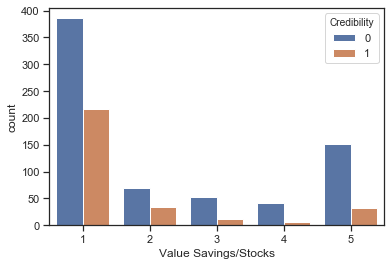

In [13]:
sns.countplot(x= 'Value Savings/Stocks', data = data, hue= 'Credibility')

 - With respect to **'Savings Account'** we can visually observe that people with '1 or '2' income are likely to have more credibility.
 - Let's quantify our observations(5 is None!)

In [14]:
####  Proportion of Savings Account with little or moderate income and their default level
# 1 - No, 0 - Yes

In [15]:
print("\nFor 1:\n",data[data['Value Savings/Stocks'] == 1]['Credibility'].value_counts().to_frame())
print("\nFor 2: \n", data[data['Value Savings/Stocks'] == 2]['Credibility'].value_counts().to_frame())


For 1:
    Credibility
0          386
1          217

For 2: 
    Credibility
0           69
1           34


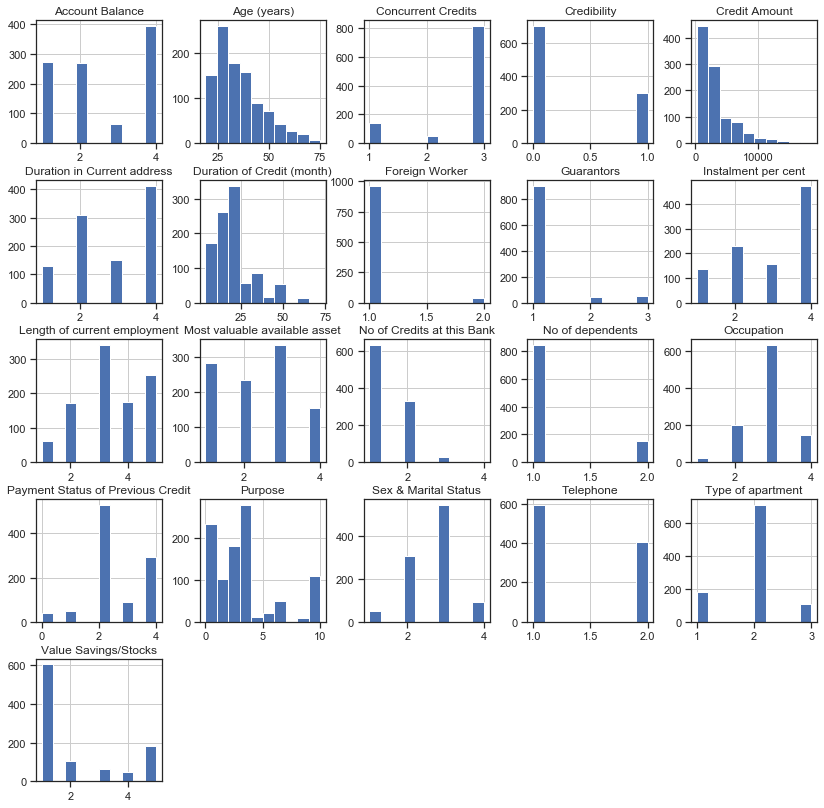

In [16]:
data[data.describe().columns].hist(figsize=(14,14))
plt.show()

None of the features is normally distributed, since they are highly skewed to the right, most distributions seem to follow a lognormal distribution.

Text(0, 0.5, 'Frequency')

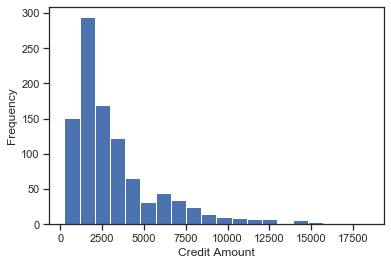

In [17]:
plt.hist(data["Credit Amount"], bins = 20)
plt.xlabel("Credit Amount")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

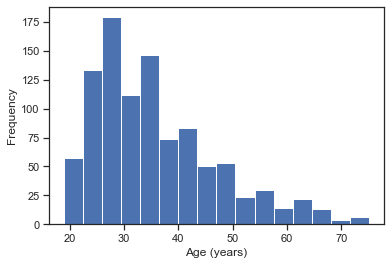

In [18]:
plt.hist(data["Age (years)"], bins = 16)
plt.xlabel("Age (years)")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

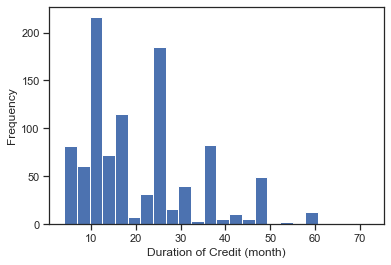

In [19]:
plt.hist(data["Duration of Credit (month)"], bins = 24)
plt.xlabel("Duration of Credit (month)")
plt.ylabel("Frequency")

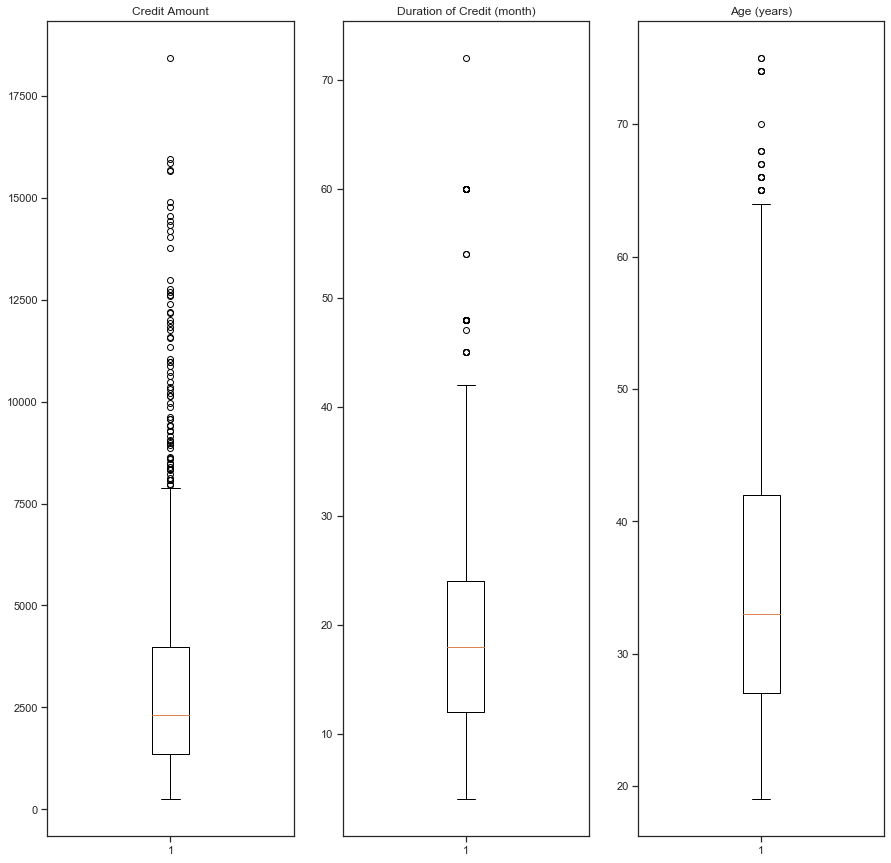

In [20]:
# Boxplots for continuous attributes
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(15,15))
axes[0].boxplot(data['Credit Amount'])
axes[0].set_title('Credit Amount')

axes[1].boxplot(data['Duration of Credit (month)'])
axes[1].set_title('Duration of Credit (month)')

axes[2].boxplot(data['Age (years)'])
axes[2].set_title('Age (years)')

fig.savefig("boxplots.png")

#sns.boxplot(x=data["Credibility"], y = data["Credit Amount"])

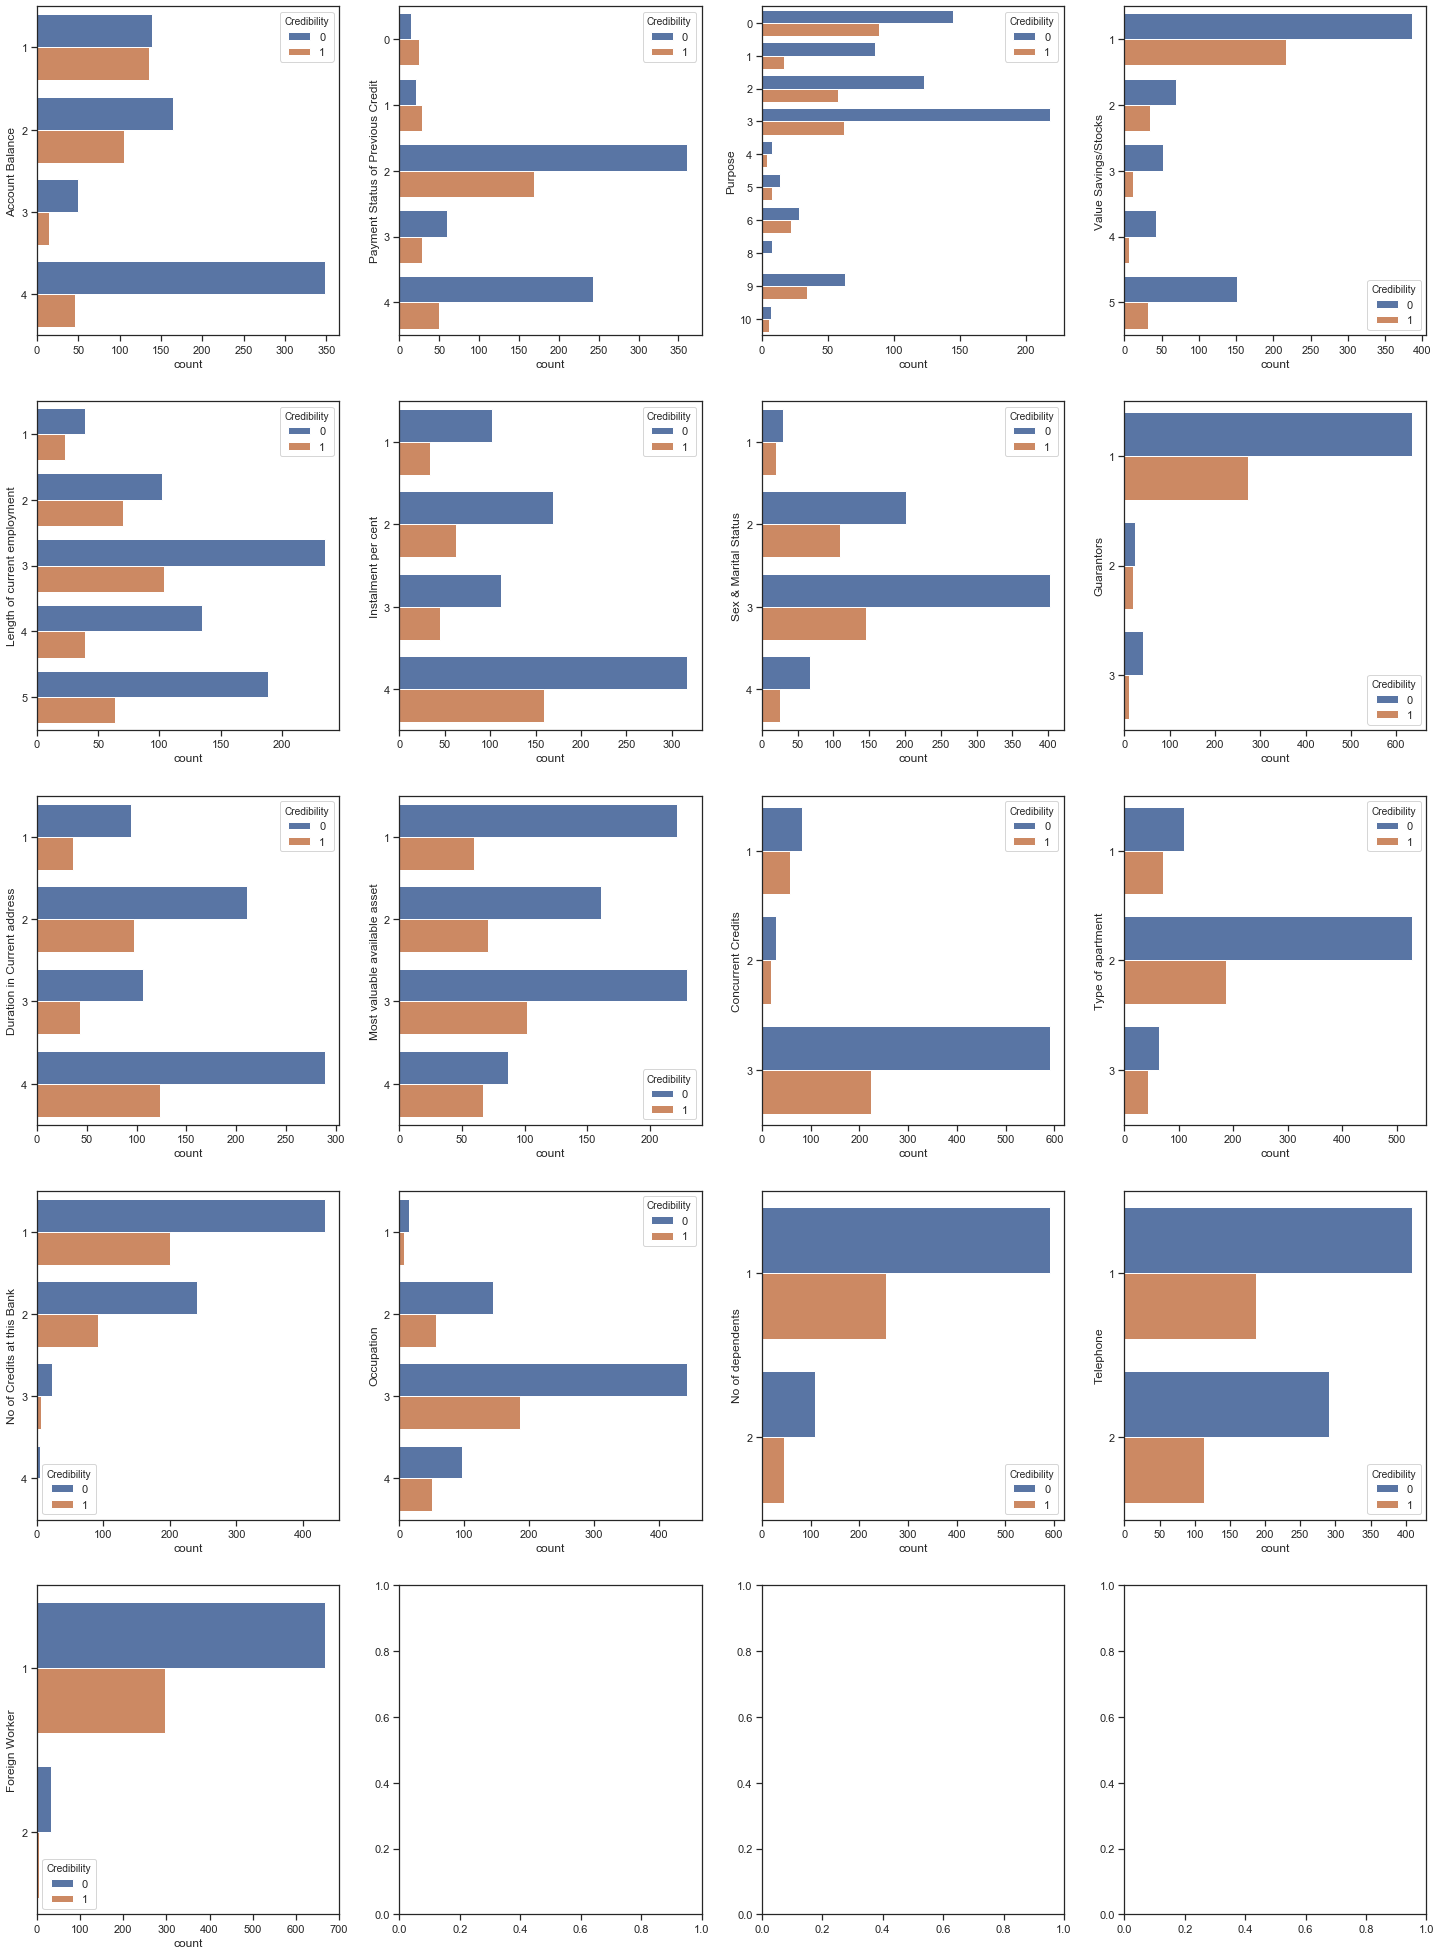

In [21]:
f, axes = plt.subplots(5, 4,figsize=(8.3*3,11.7*3))
x=0
y=0
for column in data.drop(['Credibility','Credit Amount','Duration of Credit (month)','Age (years)'], axis=1):
    sns.countplot(y=column, hue="Credibility", data=data.drop(['Credit Amount','Duration of Credit (month)','Age (years)'],axis=1), ax=axes[x,y])
    y+=1
    if y>3:
        x+=1
        y=0
    if x>4:
        break
        
f.savefig("histograms5.png")

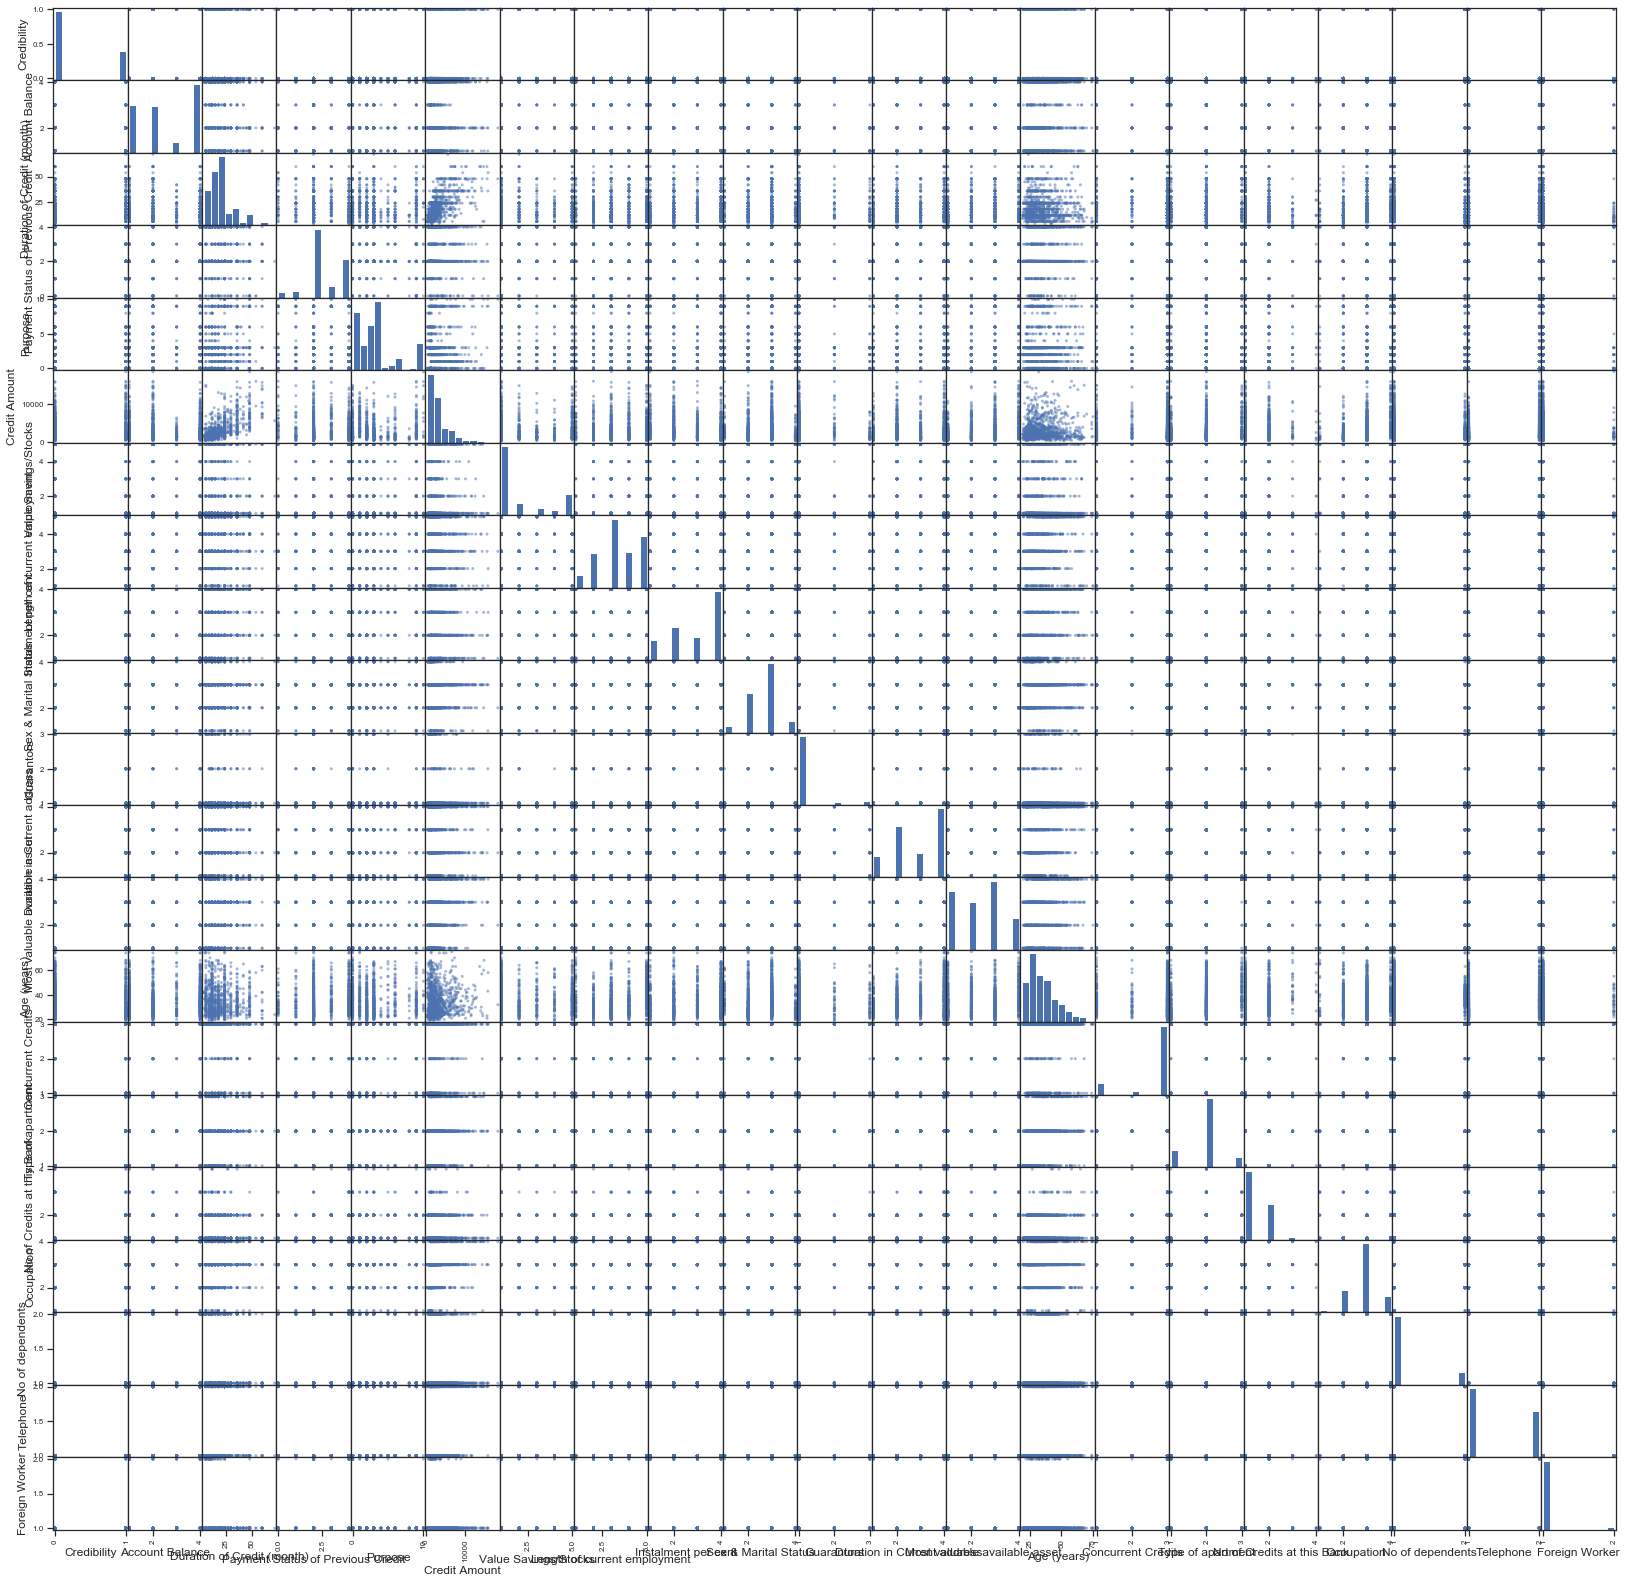

In [22]:
from pandas.plotting import scatter_matrix
scatter_matrix(data,figsize = (28,28))
plt.show()

# 4. Feature Engineering

In [23]:
### Merging Account balance 3 & 4 assigning new values (No account (1), None (No balance) (2), Some Balance (3))
data["Account Balance"].replace(4, 3, inplace = True)

In [24]:
### New Payment Status: Some Problems (1), Paid Up (2), No Problems (in this bank) (3)
data["Payment Status of Previous Credit"].replace(0, 1, inplace = True)
data["Payment Status of Previous Credit"].replace(4, 3, inplace = True)

In [25]:
### Savings/Stock Value: None, Below 100 DM, [100, 1000] DM, Above 1000 DM
data["Value Savings/Stocks"].replace(4, 3, inplace = True)
data["Value Savings/Stocks"].replace(5, 4, inplace = True)

In [26]:
### Employment Length: Below 1 year (including unemployed), [1, 4), [4, 7), Above 7
data["Length of current employment"].replace(2, 1, inplace = True)
data["Length of current employment"].replace(3, 2, inplace = True)

data["Length of current employment"].replace(4, 3, inplace = True)
data["Length of current employment"].replace(5, 4, inplace = True)

In [27]:
### Occupation: Unemployed/Unskilled, Skilled, Executive
data["Occupation"].replace(2, 1, inplace = True)
data["Occupation"].replace(3, 2, inplace = True)
data["Occupation"].replace(4, 3, inplace = True)

In [28]:
### Sex/Marital Status: Male Divorced/Single, Male Married/Widowed, Female
data["Sex & Marital Status"].replace(2, 1, inplace = True)
data["Sex & Marital Status"].replace(3, 2, inplace = True)
data["Sex & Marital Status"].replace(4, 3, inplace = True)

In [29]:
### No of Credits at this bank: 1, More than 1
data["No of Credits at this Bank"].replace(3, 2, inplace = True)
data["No of Credits at this Bank"].replace(4, 2, inplace = True)

In [30]:
### Guarantor: None, Yes
data["Guarantors"].replace(3, 2, inplace = True)

In [31]:
### Concurrent Credits: Other Banks or Dept Stores, None
data["Concurrent Credits"].replace(2, 1, inplace = True)
data["Concurrent Credits"].replace(3, 2, inplace = True)

In [32]:
### Purpose of Credit: New car, Used car, Home Related, Other
data["Purpose"].replace([3,4,5], 2, inplace = True)
data["Purpose"].replace([6,7,8,9,10], 3, inplace = True)

# 5. Data Modeling

## 5.1 Test Statistics for Numerical and Categorical

In [33]:
### Contingency tables and Chi-test for categorical variables
### Chi-square test of independence of variables in a contingency table.
sig_col_list = []
#category_col_list = ["Account Balance", "Payment Status of Previous Credit", "Value Savings/Stocks", "Length of current employment", "Sex & Marital Status", "No of Credits at this Bank", "Guarantors", "Concurrent Credits", "Type of apartment", "No of dependents", "Purpose", "Instalment per cent"]
for col in data:
    if col == "Credibility" or col =="Duration of Credit (month)" or col == "Credit Amount" or col == "Age (years)":
        pass
    else:
        contingency_tab = pd.crosstab(data["Credibility"],data[col], margins = True)
        print("---------------------------------------")
        print("\nContingency Table is:\n", contingency_tab)
        chi_stat, p_value, dof, expect_array  = scipy.stats.chi2_contingency(contingency_tab, correction = True)
        msg = "Chi Test Statistic: {}\np-value: {}\ndof: {}"
        print(msg.format(chi_stat, p_value, dof))
        print
        if p_value < 0.05: #Threshold probability of 0.05
            sig_col_list.append(col)

---------------------------------------

Contingency Table is:
 Account Balance    1    2    3   All
Credibility                         
0                139  164  397   700
1                135  105   60   300
All              274  269  457  1000
Chi Test Statistic: 120.84376361168343
p-value: 1.0835313644402181e-23
dof: 6
---------------------------------------

Contingency Table is:
 Payment Status of Previous Credit   1    2    3   All
Credibility                                          
0                                  36  361  303   700
1                                  53  169   78   300
All                                89  530  381  1000
Chi Test Statistic: 54.37609969095182
p-value: 6.194785616657e-10
dof: 6
---------------------------------------

Contingency Table is:
 Purpose        0    1    2    3   All
Credibility                          
0            145   86  363  106   700
1             89   17  132   62   300
All          234  103  495  168  1000
Chi Test Sta

In [34]:
print(sig_col_list)

['Account Balance', 'Payment Status of Previous Credit', 'Purpose', 'Value Savings/Stocks', 'Length of current employment', 'Most valuable available asset', 'Concurrent Credits', 'Type of apartment']


In [35]:
### Calculating P-value (T-TEST) for continuous variables - Credit Amount
for i in numvars:
    df_credit_0 = data[data["Credibility"] == 0][i]
    df_credit_1 = data[data["Credibility"] == 1][i]
    t_stat, p_test = scipy.stats.ttest_ind(df_credit_0,df_credit_1)
    print(i)
    if p_test <= 0.05:
        print("p_test is too low, so t_stat falls in critical region: Reject Null")
        sig_col_list.append(i)
        print("\n")
    else:
        print("Fails to reject Null Hypothesis")

Credit Amount
p_test is too low, so t_stat falls in critical region: Reject Null


Duration of Credit (month)
p_test is too low, so t_stat falls in critical region: Reject Null


Age (years)
p_test is too low, so t_stat falls in critical region: Reject Null




# Method -1 Upsampling Minority(ROS)

- https://towardsdatascience.com/comparing-different-classification-machine-learning-models-for-an-imbalanced-dataset-fdae1af3677f

In [36]:
data['Credibility'].value_counts()

0    700
1    300
Name: Credibility, dtype: int64

In [37]:
from sklearn.utils import resample

In [38]:
data_majority = data[data.Credibility == 0]
data_minority = data[data.Credibility == 1]

data_minority_upsampled = resample(data_minority,replace=True,n_samples=600,random_state=666) 

data_train = pd.concat([data_majority, data_minority_upsampled])

In [39]:
data_train.Credibility.value_counts()

0    700
1    600
Name: Credibility, dtype: int64

In [40]:
X = data_train.loc[:, data_train.columns != 'Credibility']
y = data_train.loc[:, data_train.columns == 'Credibility']
x1 = X.copy()

### 5.1.3 Data Stadardization: Dummification of Categorical Columns and Normalization of Numerical Columns¶

In [41]:
# One hot encoding
#create dummy variables for every category of every categorical variable
dummyvars = pd.get_dummies(data_train[catvars])

## Joining New dummified and Numerical columns
x_new = pd.concat([dummyvars, x1[numvars]], axis=1)

#### Normalizing the Dataset
ss = StandardScaler()

x_normal = ss.fit_transform(x_new)

### 5.1.4 Dividing the Data into 'Train', 'Validation' and 'Test' Sets

In [42]:
SEED = 666

In [43]:
y.shape

(1300, 1)

In [44]:
x_int, x_test, y_int, y_test = train_test_split(x_normal, y, test_size=100, stratify=y, random_state = SEED)

In [45]:
x_train,x_val,y_train,y_val = train_test_split(x_int, y_int, test_size=100, stratify = y_int, random_state = SEED)

In [46]:
x_int.shape

(1200, 15)

In [47]:
# print proportions
print('train: {}% | Validation: {}% | Test: {}%'.format(round(len(y_train)/len(y),2), round(len(y_val)/len(y) ,2), round(len(y_test)/len(y),2)))

train: 0.85% | Validation: 0.08% | Test: 0.08%


## 5.2 Model Comparison - Method1

In [48]:
models = []

models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('Grad', GradientBoostingClassifier()))

# Model Evaluation
result = []
model_names = []
scoring = ['accuracy', 'recall', 'precision', 'roc_auc','f1']

for model_name, model in models:
    kfold = KFold(n_splits=10, random_state=SEED)
    cv_results1 = cross_val_score(model, x_train, y_train, cv = kfold, scoring=scoring[0])
    cv_results2 = cross_val_score(model, x_train, y_train, cv = kfold, scoring=scoring[1])
    cv_results3 = cross_val_score(model, x_train, y_train, cv = kfold, scoring=scoring[2])
    cv_results4 = cross_val_score(model, x_train, y_train, cv = kfold, scoring=scoring[3])
    cv_results5 = cross_val_score(model, x_train, y_train, cv = kfold, scoring=scoring[4])
    model_names.append(model_name)
    msg = "%s:\n ACCURACY = %f, RECALL=(%f), PRECISION=(%f), ROC-AUC=(%f), F1-SCORE=(%f)" % (model_name, cv_results1.mean(),cv_results2.mean(), cv_results3.mean(), cv_results4.mean(), cv_results5.mean())
    print(msg)

LR:
 ACCURACY = 0.718182, RECALL=(0.660734), PRECISION=(0.705541), ROC-AUC=(0.782295), F1-SCORE=(0.680310)
DT:
 ACCURACY = 0.831818, RECALL=(0.910172), PRECISION=(0.757887), ROC-AUC=(0.833601), F1-SCORE=(0.827186)
RF:
 ACCURACY = 0.880909, RECALL=(0.905504), PRECISION=(0.853489), ROC-AUC=(0.951554), F1-SCORE=(0.867971)
Grad:
 ACCURACY = 0.800000, RECALL=(0.812013), PRECISION=(0.767737), ROC-AUC=(0.874696), F1-SCORE=(0.788246)


The Random Forest Classifier is the best performing so far. Being this a binary classification problem with an imbalanced dataset, I am mostly concerned with the f1 and roc_auc scores. The f1 score is the harmonic mean between precision and recall, while the roc_auc score is the area under the roc curve from the predicted values. It is important to distiguish between both categories since marketing strategies could be costly if not applied correctly to the users.

## 5.3 Model Selection: Random Forest Classifier

In [49]:
rf = RandomForestClassifier()

model = rf.fit(x_train, y_train)

model.score(x_val, y_val)

0.88

In [50]:
# Fitting the model using the intermediate dataset.
model2 = rf.fit(x_int, y_int)

model2.score(x_test, y_test)

0.9

In [51]:
# Predicted value of each class
y_pred = model2.predict(x_test)

In [52]:
cMatrix = confusion_matrix(y_test, y_pred)
print(cMatrix)
print("Transactions which were falsely classified as FRAUD =  %.1f Percent" %(cMatrix[0][1]/ sum(sum(cMatrix))*100 ) )
print("Transactions which were falsely classified as NOT-FRAUD = %.1f Percent"%(cMatrix[1][0]/ sum(sum(cMatrix))*100 ) )
print("Transactions which were truly classified as FRAUD = %.1f Percent"% (cMatrix[1][1]/ sum(sum(cMatrix))*100 ) )
print("Transactions which were truly classified as NOT-FRAUD = %.1f Percent"% (cMatrix[0][0]/ sum(sum(cMatrix))*100 ))

[[48  6]
 [ 4 42]]
Transactions which were falsely classified as FRAUD =  6.0 Percent
Transactions which were falsely classified as NOT-FRAUD = 4.0 Percent
Transactions which were truly classified as FRAUD = 42.0 Percent
Transactions which were truly classified as NOT-FRAUD = 48.0 Percent


Pre-processing and feature engineering really helped to improve the models ingeneral. The key takeaway is that this transformations will help create more robut model on he hyperparameter tunning section,

# 5.4 Model Optimization

Before jumping into tunning the models, I will look into (PCA) to reduce linear dimensionality of the data and helping the models process the information faster. First I will plot the the PCA spectrum to find the optimal range of n_estimators that capture the most variance in the data, then after that I will create a pipeline with GridSearch for each of the models beign tested.

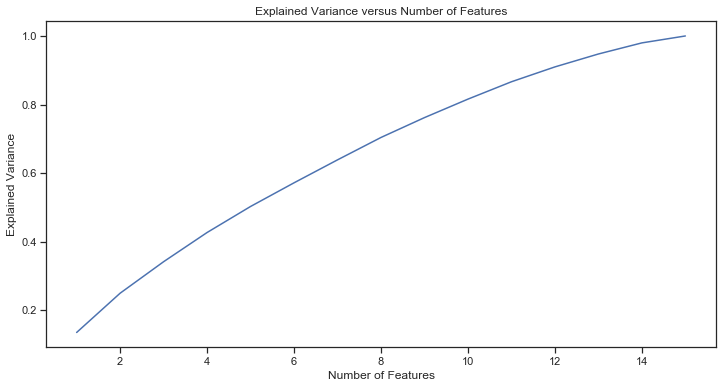

In [53]:
#Instantiate Principal Component Analysis.
pca=PCA()
X_pca = pca.fit_transform(x_train)
fig = plt.figure(figsize=(12,6))
plt.plot(range(1,x_train.shape[1]+1), pca.explained_variance_ratio_.cumsum())
plt.title('Explained Variance versus Number of Features')
plt.ylabel('Explained Variance')
plt.xlabel('Number of Features')
plt.show()

In [54]:
for n in [8,10,12,14]:
    pca_n = PCA(n_components=n)
    X_pcan = pca_n.fit_transform(x_train)
    tev = round(np.sum(pca_n.explained_variance_ratio_)*100,2)
    print('Number of Features: ',n, 'Total Explained Variance: ',tev,'%')

Number of Features:  8 Total Explained Variance:  70.41 %
Number of Features:  10 Total Explained Variance:  81.59 %
Number of Features:  12 Total Explained Variance:  90.98 %
Number of Features:  14 Total Explained Variance:  97.98 %


From this graph I notice that the total explained variace starts to increase at a diminishing rate at around n_components=10. It also reduces dimensionality by a fourth of the size with just above 80% of the total variance explained, But I would like the pipelines to try with n_components of 10,12,and 14.

# 5. Classification Models

In [55]:
#Create pipeline for each of the classifiers.
pipelines = {'logisticregression': Pipeline([('pca', PCA()),
                                            ('clf', LogisticRegression(random_state=123))]),
            'decisiontree':Pipeline([('pca', PCA()),
                                            ('clf', DecisionTreeClassifier(random_state=123))]),
            'randomforest':Pipeline([('pca', PCA()),
                                            ('clf', RandomForestClassifier(random_state=123))]),
            'gradientboosting': Pipeline([('pca', PCA()),
                                            ('clf', GradientBoostingClassifier(random_state=123))])}

#Define Hyperparameters for each pipeline
hyperparameters_lr ={'pca__n_components': [10, 12, 14],
                     'clf__C': [0.01,0.1,1]}

hyperparameters_dt ={'pca__n_components': [10, 12, 14],
                     'clf__criterion': ['entropy', 'gini'], 
                     'clf__max_depth': [4, 5, 6],  
                     'clf__min_samples_leaf':[0.05 ,0.1, 0.2],  
                     'clf__min_samples_split':[0.05 ,0.1, 0.2]}

hyperparameters_rf ={'pca__n_components': [10, 12, 14],
                     'clf__n_estimators': [100,150],
                     'clf__criterion': ['entropy', 'gini'], 
                     'clf__max_depth': [4, 5, 6],  
                     'clf__min_samples_leaf':[0.05 ,0.1, 0.2],  
                     'clf__min_samples_split':[0.05 ,0.1, 0.2]}

hyperparameters_gb ={'pca__n_components': [10, 12, 14],
                     'clf__n_estimators': [100,150], 
                     'clf__max_depth': [1, 3, 5],  
                     'clf__learning_rate': [0.05,0.1]}

#Instantiate hyperparapeter dictionary
hyperparameters = {'logisticregression':hyperparameters_lr ,
                   'decisiontree':hyperparameters_dt,
                   'randomforest':hyperparameters_rf,
                   'gradientboosting': hyperparameters_gb}

In [56]:
model_scores_auc, fitted_models_auc = grid_pipe(pipelines,hyperparameters,scoring='roc_auc')

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


The logisticregression model has been fitted.
Best accuracy: 0.783
Best params:
 {'clf__C': 0.01, 'pca__n_components': 14} 

0.7827666928493161 (0.021269957542150195) with: {'clf__C': 0.01, 'pca__n_components': 10}
0.782850881584384 (0.01808949332930022) with: {'clf__C': 0.01, 'pca__n_components': 12}
0.7833659088740379 (0.018290890621875437) with: {'clf__C': 0.01, 'pca__n_components': 14}
0.7813860634033778 (0.021936988610959038) with: {'clf__C': 0.1, 'pca__n_components': 10}
0.7821015736383495 (0.019089429096634792) with: {'clf__C': 0.1, 'pca__n_components': 12}
0.7824836428949832 (0.019310968709813754) with: {'clf__C': 0.1, 'pca__n_components': 14}
0.7808372148993848 (0.02203058362242515) with: {'clf__C': 1, 'pca__n_components': 10}
0.7819683100627396 (0.019678164644374985) with: {'clf__C': 1, 'pca__n_components': 12}
0.782466979072213 (0.019264507476808305) with: {'clf__C': 1, 'pca__n_components': 14}
Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Done 362 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:    4.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


The decisiontree model has been fitted.
Best accuracy: 0.747
Best params:
 {'clf__criterion': 'entropy', 'clf__max_depth': 6, 'clf__min_samples_leaf': 0.05, 'clf__min_samples_split': 0.05, 'pca__n_components': 10} 

0.7415564363016561 (0.03125873378162038) with: {'clf__criterion': 'entropy', 'clf__max_depth': 4, 'clf__min_samples_leaf': 0.05, 'clf__min_samples_split': 0.05, 'pca__n_components': 10}
0.7418429764924933 (0.03303920657424922) with: {'clf__criterion': 'entropy', 'clf__max_depth': 4, 'clf__min_samples_leaf': 0.05, 'clf__min_samples_split': 0.05, 'pca__n_components': 12}
0.7445515175360293 (0.03481600025639054) with: {'clf__criterion': 'entropy', 'clf__max_depth': 4, 'clf__min_samples_leaf': 0.05, 'clf__min_samples_split': 0.05, 'pca__n_components': 14}
0.7415564363016561 (0.03125873378162038) with: {'clf__criterion': 'entropy', 'clf__max_depth': 4, 'clf__min_samples_leaf': 0.05, 'clf__min_samples_split': 0.1, 'pca__n_components': 10}
0.7418429764924933 (0.03303920657424922) 

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:  2.7min finished


The randomforest model has been fitted.
Best accuracy: 0.808
Best params:
 {'clf__criterion': 'gini', 'clf__max_depth': 6, 'clf__min_samples_leaf': 0.05, 'clf__min_samples_split': 0.05, 'clf__n_estimators': 100, 'pca__n_components': 14} 

0.7942783624609435 (0.019480653685027983) with: {'clf__criterion': 'entropy', 'clf__max_depth': 4, 'clf__min_samples_leaf': 0.05, 'clf__min_samples_split': 0.05, 'clf__n_estimators': 100, 'pca__n_components': 10}
0.7977189835491167 (0.014940061998668697) with: {'clf__criterion': 'entropy', 'clf__max_depth': 4, 'clf__min_samples_leaf': 0.05, 'clf__min_samples_split': 0.05, 'clf__n_estimators': 100, 'pca__n_components': 12}
0.8032931850370624 (0.013555873716366705) with: {'clf__criterion': 'entropy', 'clf__max_depth': 4, 'clf__min_samples_leaf': 0.05, 'clf__min_samples_split': 0.05, 'clf__n_estimators': 100, 'pca__n_components': 14}
0.7969714853553437 (0.019322150787794656) with: {'clf__criterion': 'entropy', 'clf__max_depth': 4, 'clf__min_samples_leaf'

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   34.6s finished


The gradientboosting model has been fitted.
Best accuracy: 0.925
Best params:
 {'clf__learning_rate': 0.1, 'clf__max_depth': 5, 'clf__n_estimators': 150, 'pca__n_components': 14} 

0.7756431553994311 (0.030035842970881816) with: {'clf__learning_rate': 0.05, 'clf__max_depth': 1, 'clf__n_estimators': 100, 'pca__n_components': 10}
0.7747616415252121 (0.030555263549404316) with: {'clf__learning_rate': 0.05, 'clf__max_depth': 1, 'clf__n_estimators': 100, 'pca__n_components': 12}
0.7743625676483046 (0.031210532083896313) with: {'clf__learning_rate': 0.05, 'clf__max_depth': 1, 'clf__n_estimators': 100, 'pca__n_components': 14}
0.7878191686139131 (0.027303490831755175) with: {'clf__learning_rate': 0.05, 'clf__max_depth': 1, 'clf__n_estimators': 150, 'pca__n_components': 10}
0.7883016438661384 (0.027391161921660388) with: {'clf__learning_rate': 0.05, 'clf__max_depth': 1, 'clf__n_estimators': 150, 'pca__n_components': 12}
0.788751120518689 (0.026058775041122886) with: {'clf__learning_rate': 0.05

In [57]:
score_times_df_auc = pd.DataFrame(model_scores_auc,columns=['classifier','roc_auc_score','time']).set_index('classifier').sort_values('time')
score_times_df_auc

,roc_auc_score,time
classifier,,
logisticregression,0.783366,2.520584
decisiontree,0.746919,4.990831
gradientboosting,0.924516,35.645602
randomforest,0.808215,161.291374


After hypertuning the models, we found out that best model is Gradient Boost, and the second  best is random forest classifier which took more time.

In [58]:
model_scores_f1, fitted_models_f1 = grid_pipe(pipelines,hyperparameters,scoring='f1')

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


The logisticregression model has been fitted.
Best accuracy: 0.698
Best params:
 {'clf__C': 0.01, 'pca__n_components': 10} 

0.6980756013745705 (0.018846659152541537) with: {'clf__C': 0.01, 'pca__n_components': 10}
0.684246473529442 (0.017258590293788068) with: {'clf__C': 0.01, 'pca__n_components': 12}
0.6869968191957747 (0.019240739926751682) with: {'clf__C': 0.01, 'pca__n_components': 14}
0.6939515200019402 (0.02510374838479685) with: {'clf__C': 0.1, 'pca__n_components': 10}
0.681882134774956 (0.016521585436632378) with: {'clf__C': 0.1, 'pca__n_components': 12}
0.6886616625144862 (0.017121708251440552) with: {'clf__C': 0.1, 'pca__n_components': 14}
0.6925979846484048 (0.026154240448436672) with: {'clf__C': 1, 'pca__n_components': 10}
0.6864690334154613 (0.01724555897415068) with: {'clf__C': 1, 'pca__n_components': 12}
0.6851792912901088 (0.015816016217201415) with: {'clf__C': 1, 'pca__n_components': 14}
Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Done 358 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


The decisiontree model has been fitted.
Best accuracy: 0.671
Best params:
 {'clf__criterion': 'gini', 'clf__max_depth': 4, 'clf__min_samples_leaf': 0.05, 'clf__min_samples_split': 0.2, 'pca__n_components': 10} 

0.6616743747497673 (0.03063652628499976) with: {'clf__criterion': 'entropy', 'clf__max_depth': 4, 'clf__min_samples_leaf': 0.05, 'clf__min_samples_split': 0.05, 'pca__n_components': 10}
0.6541072148978876 (0.022431964870420176) with: {'clf__criterion': 'entropy', 'clf__max_depth': 4, 'clf__min_samples_leaf': 0.05, 'clf__min_samples_split': 0.05, 'pca__n_components': 12}
0.6584310736403511 (0.0229443618329494) with: {'clf__criterion': 'entropy', 'clf__max_depth': 4, 'clf__min_samples_leaf': 0.05, 'clf__min_samples_split': 0.05, 'pca__n_components': 14}
0.6616743747497673 (0.03063652628499976) with: {'clf__criterion': 'entropy', 'clf__max_depth': 4, 'clf__min_samples_leaf': 0.05, 'clf__min_samples_split': 0.1, 'pca__n_components': 10}
0.6541072148978876 (0.022431964870420176) wit

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   42.7s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:  2.9min finished


The randomforest model has been fitted.
Best accuracy: 0.716
Best params:
 {'clf__criterion': 'gini', 'clf__max_depth': 6, 'clf__min_samples_leaf': 0.05, 'clf__min_samples_split': 0.05, 'clf__n_estimators': 150, 'pca__n_components': 10} 

0.6934431158446059 (0.014999361432103732) with: {'clf__criterion': 'entropy', 'clf__max_depth': 4, 'clf__min_samples_leaf': 0.05, 'clf__min_samples_split': 0.05, 'clf__n_estimators': 100, 'pca__n_components': 10}
0.6900373785152261 (0.026446622514884607) with: {'clf__criterion': 'entropy', 'clf__max_depth': 4, 'clf__min_samples_leaf': 0.05, 'clf__min_samples_split': 0.05, 'clf__n_estimators': 100, 'pca__n_components': 12}
0.7045694003776197 (0.026795546870431373) with: {'clf__criterion': 'entropy', 'clf__max_depth': 4, 'clf__min_samples_leaf': 0.05, 'clf__min_samples_split': 0.05, 'clf__n_estimators': 100, 'pca__n_components': 14}
0.698387521779114 (0.016259013564490145) with: {'clf__criterion': 'entropy', 'clf__max_depth': 4, 'clf__min_samples_leaf':

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   35.1s finished


The gradientboosting model has been fitted.
Best accuracy: 0.853
Best params:
 {'clf__learning_rate': 0.1, 'clf__max_depth': 5, 'clf__n_estimators': 150, 'pca__n_components': 14} 

0.6823401493213328 (0.03220579472136767) with: {'clf__learning_rate': 0.05, 'clf__max_depth': 1, 'clf__n_estimators': 100, 'pca__n_components': 10}
0.6795822393178979 (0.03444128129671581) with: {'clf__learning_rate': 0.05, 'clf__max_depth': 1, 'clf__n_estimators': 100, 'pca__n_components': 12}
0.6761547993945658 (0.03505886783656572) with: {'clf__learning_rate': 0.05, 'clf__max_depth': 1, 'clf__n_estimators': 100, 'pca__n_components': 14}
0.7013853490642887 (0.03172103484345515) with: {'clf__learning_rate': 0.05, 'clf__max_depth': 1, 'clf__n_estimators': 150, 'pca__n_components': 10}
0.7039240084206198 (0.03176087035721128) with: {'clf__learning_rate': 0.05, 'clf__max_depth': 1, 'clf__n_estimators': 150, 'pca__n_components': 12}
0.698632461255307 (0.03080540456534306) with: {'clf__learning_rate': 0.05, 'clf

In [59]:
score_times_df_f1 = pd.DataFrame(model_scores_f1,columns=['classifier','f1_score','time']).set_index('classifier').sort_values('time')
score_times_df_f1

,f1_score,time
classifier,,
logisticregression,0.698076,0.219169
decisiontree,0.671341,3.905810
gradientboosting,0.853179,36.245695
randomforest,0.715584,173.408184


After running the grid search pipeline, the two best performing models are gradient boosting and random forest classifier. Gradient boosting surpasses in every metric including running time. Hence, it will be important to consider the trade-off between computational cost and time.

In [62]:
score_times_df_f1.loc[['gradientboosting','randomforest']]

,f1_score,time
classifier,,
gradientboosting,0.853179,36.245695
randomforest,0.715584,173.408184


In [63]:
score_times_df_auc.loc[['gradientboosting','randomforest']]

,roc_auc_score,time
classifier,,
gradientboosting,0.924516,35.645602
randomforest,0.808215,161.291374
